In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)
! pwd

atomickitty.aws
compthink
/opt/jupyterhub/bin/python3
3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
/home/compthink/CECE-1330-PsuedoCourse/1-Lessons/Lesson15


In [2]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

# Lesson 15 : Hypothesis Testing
![](https://www.thermofisher.com/blog/wp-content/uploads/sites/11/2018/01/istock-829172394_redumbrella.jpg)

#### In statistics, when we wish to start asking questions about the data and interpret the results, we use statistical methods that provide a confidence or likelihood about the answers. In general, this class of methods is called statistical hypothesis testing, or significance tests. The material for today's lecture is inspired by and gathered from several resources including:
- __*Hypothesis testing in Machine learning using Python* by *Yogesh Agrawal* available at https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce__
- __*Demystifying hypothesis testing with simple Python examples* by *Tirthajyoti Sarkar* available at https://towardsdatascience.com/demystifying-hypothesis-testing-with-simple-python-examples-4997ad3c5294__
- __*A Gentle Introduction to Statistical Hypothesis Testing* by *Jason Brownlee* available at https://machinelearningmastery.com/statistical-hypothesis-tests/__ 

#### Let's go over a few important concepts first.

#### <font color=crimson>What is hypothesis testing ?</font><br>
__Hypothesis testing is a statistical method that is used in making statistical decisions (about population) using experimental data (samples). Hypothesis Testing is basically an assumption that we make about the population parameter.<br>
Ex : you say on average, students in the class are taller than 5 ft and 4 inches or an average boy is taller than girls or a specific treatment is effective in treating COVID-19 patients. <br>
We need some mathematical conclusion that whatever we are assuming is true. We will validate our hypotheses, basing our conclusion on random samples and empirical distributions.__

#### <font color=crimson>Why do we use it ?</font><br>
__Hypothesis testing is an essential procedure in statistics. A hypothesis test evaluates two mutually exclusive statements about a population to determine which statement is best supported by the sample data. When we say that a finding is statistically significant, it’s thanks to a hypothesis test.__

![](https://luminousmen.com/media/demystifying-hypothesis-testing.jpg)

#### <font color=crimson>Which are important elements of hypothesis testing ?</font><br>
__Null hypothesis :<br> 
    The assumption of a statistical test is called the null hypothesis, or hypothesis 0 (H0 for short). It is often called the default assumption, or the assumption that nothing has changed. In inferential statistics, the null hypothesis is a general statement or default position that there is no relationship between two measured phenomena, or no association among groups. In other words it is a basic assumption or made based on domain or problem knowledge.
Example : a company' production is = 50 unit/per day.__
    
__Alternative hypothesis :__<br> 
    __A violation of the test’s assumption is often called the first hypothesis, hypothesis 1 or H1 for short. H1 is really a short hand for “some other hypothesis,” as all we know is that the evidence suggests that the H0 can be rejected. The alternative hypothesis is the hypothesis used in hypothesis testing that is contrary to the null hypothesis. It is usually taken to be that the observations are the result of a real effect (with some amount of chance variation superposed). 
Example : a company's production is !=50 unit/per day.__
    

#### <font color=crimson>What are basic of hypothesis ?</font><br>
   __The basic of hypothesis is normalisation and standard normalisation. all our hypothesis is revolve around basic of these 2 terms.__<br>
![](https://miro.medium.com/max/350/1*U-cR-vP8pYUmLUDwCPv23A.png) <br>
![](https://miro.medium.com/max/350/1*2vTwIrqdELKJY-tpheO7GA.jpeg) <br>

   __in the 1st image, you can see there are different normal curves. Those normal curves have different means and variances. In the 2nd image if you notice the graph is properly distributed with a mean =0 and variance =1. Concept of z-score comes in picture when we use standardized normal data.__

#### Normal Distribution:
    A variable is said to be normally distributed or have a normal distribution if its distribution has the shape of a normal curve — a special bell-shaped curve. The graph of a normal distribution is called the normal curve, for which the mean, median, and mode are equal. (The 1st Image)
#### Standardised Normal Distribution:
    A standard normal distribution is a normal distribution with mean 0 and standard deviation 1 (The 2nd Image)

#### <font color=crimson>Z score:</font><br>
   __It is a method of expressing data in relation to the group mean. To obtain the Z-score of a particular data, we calculate its deviation from the mean and then divide it by the SD.__<br> 
![](https://clavelresearch.files.wordpress.com/2019/03/z-score-sample.png) <br>

__The Z score is one way of standardizing a score so that it can be referred to a standard normal distribution curve.__<br>  
![](https://datalabbd.com/wp-content/uploads/2019/05/4a.png) <br>

_Read more on Z-Score @_
- __*Z-Score: Definition, Formula and Calculation* available at https://www.statisticshowto.com/probability-and-statistics/z-score/__
- __*Z-Score: Definition, Calculation and Interpretation* by *Saul McLeod* available at https://www.simplypsychology.org/z-score.html__


#### <font color=crimson>Tailing of Hypothesis:</font><br>
   __Depending on the research question hypothesis can be of 2 types. In the Nondirectional (two-tailed) test the Research Question is like: Is there a (statistically) significant difference between scores of Group-A and Group-B in a certain competition? In Directional (one-tailed) test the Research Question is like: Do Group-A score significantly higher than Group-B in a certain competition?__<br> 
   
![](https://datalabbd.com/wp-content/uploads/2019/05/4d.png) <br>

_Read more on Tailing @_
- __*One- and two-tailed tests* available at https://en.wikipedia.org/wiki/One-_and_two-tailed_tests__
- __*Z-Score: Definition, Calculation and Interpretation* by *Saul McLeod* available at https://www.simplypsychology.org/z-score.html__

#### <font color=crimson>Level of significance:</font><br>
![](https://saffold.com/blog/wp-content/uploads/2014/04/significance.png)<br>
    __Refers to the degree of significance in which we accept or reject the null-hypothesis. 100% accuracy is not possible for accepting or rejecting a hypothesis, so we therefore select a level of significance.
This is normally denoted with alpha and generally it is 0.05 or 5% , which means your output should be 95% confident to give similar kind of result in each sample. A smaller alpha value suggests a more robust interpretation of the null hypothesis, such as 1% or 0.1%.__

#### <font color=crimson>P-value :</font><br>
   __The P value, or calculated probability, is the probability (p-value) of the collected data, given that the null hypothesis was true. The p-value reflects the strength of evidence against the null hypothesis. Accordingly, we’ll encounter two situations: the strength is strong enough or not strong enough to reject the null hypothesis.__
   __The p-value is compared to the pre-chosen alpha value. A result is statistically significant when the p-value is less than alpha. If your P value is less than the chosen significance level then you reject the null hypothesis i.e. accept that your sample gives reasonable evidence to support the alternative hypothesis.

__If p-value > alpha: Fail to reject the null hypothesis (i.e. not significant result).__<br>
__If p-value <= alpha: Reject the null hypothesis (i.e. significant result).__<br>


![](https://www.simplypsychology.org/p-value.png)<br>


For example, if we were performing a test of whether a data sample was normal and we calculated a p-value of .07, we could state something like:

    "The test found that the data sample was normal, failing to reject the null hypothesis at a 5% significance level.""

The significance level can be inverted by subtracting it from 1 to give a __confidence level__ of the hypothesis given the observed sample data.
Therefore, statements such as the following can also be made:

    "The test found that the data was normal, failing to reject the null hypothesis at a 95% confidence level.""

__Example :__<br>
you have a coin and you don’t know whether that is fair or tricky so let’s decide null and alternate hypothes is<br>
H0 : a coin is a fair coin.<br>
H1 : a coin is a tricky coin. and alpha = 5% or 0.05<br>
Now let’s toss the coin and calculate p- value ( probability value).<br>
Toss a coin 1st time and result is tail- P-value = 50% (as head and tail have equal probability)<br>
Toss a coin 2nd time and result is tail, now p-value = 50/2 = 25%<br>
and similarly we Toss 6 consecutive times and got result as P-value = 1.5% but we set our significance level as 95% means 5% error rate is allowed and here we see we are beyond that level i.e. our null- hypothesis does not hold good so we need to reject and propose that this coin is not fair.

_Read more on p-value @_<br>
- __*P-values Explained By Data Scientist For Data Scientists* by *Admond Lee* available at https://towardsdatascience.com/p-values-explained-by-data-scientist-f40a746cfc8__<br>
- __*What a p-Value Tells You about Statistical Data* by *Deborah J. Rumsey* available at https://www.dummies.com/education/math/statistics/what-a-p-value-tells-you-about-statistical-data/.__<br>
- __*Key to statistical result interpretation: P-value in plain English* by *Tran Quang Hung* available at https://s4be.cochrane.org/blog/2016/03/21/p-value-in-plain-english-2/__<br>

_Watch more on p-value @_<br>
- *StatQuest: P Values, clearly explained* available at https://www.youtube.com/watch?v=5Z9OIYA8He8<br>
- *Understanding the p-value - Statistics Help* available at https://www.youtube.com/watch?v=eyknGvncKLw<br>
- *What Is A P-Value? - Clearly Explained* available at https://www.youtube.com/watch?v=ukcFrzt6cHk<br>


#### <font color=crimson>“Reject” vs “Failure to Reject”</font><br>
   __The p-value is probabilistic. This means that when we interpret the result of a statistical test, we do not know what is true or false, only what is likely. Rejecting the null hypothesis means that there is sufficient statistical evidence (from the samples) that the null hypothesis does not look likely (for the population). Otherwise, it means that there is not sufficient statistical evidence to reject the null hypothesis.__<br>

   __We may think about the statistical test in terms of the dichotomy of rejecting and accepting the null hypothesis. The danger is that if we say that we “accept” the null hypothesis, the language suggests that the null hypothesis is true. Instead, it is safer to say that we “fail to reject” the null hypothesis, as in, there is insufficient statistical evidence to reject it.__<br>

#### <font color=crimson>Errors in Statistical Tests</font><br>
   __The interpretation of a statistical hypothesis test is probabilistic. That means that the evidence of the test may suggest an outcome and be mistaken. For example, if alpha was 5%, it suggests that (at most) 1 time in 20 that the null hypothesis would be mistakenly rejected or failed to be rejected (e.g., because of the statistical noise in the data sample).__<br>

   __Having a small p-value (rejecting the null hypothesis) either means that the null hypothesis is false (we got it right) or it is true and some rare and unlikely event has been observed (we made a mistake). If this type of error is made, it is called a false positive. We falsely rejected of the null hypothesis. Alternately, given a large p-value (failing to reject the null hypothesis), it may mean that the null hypothesis is true (we got it right) or that the null hypothesis is false and some unlikely event occurred (we made a mistake). If this type of error is made, it is called a false negative. We falsely believe the null hypothesis or assumption of the statistical test.__<br>

![](https://res.cloudinary.com/data-science-dojo/image/upload/v1527879483/type1and2error_bglnqy.gif)<br>

   __Each of these two types of error has a specific name:<br>
   Type I Error: The incorrect rejection of a true null hypothesis or a false positive.<br>
   Type II Error: The incorrect failure of rejection of a false null hypothesis or a false negative.__<br>

![](https://miro.medium.com/max/619/1*T5mfQqhcn-nB-n7LOiPv6A.png)<br>

__All statistical hypothesis tests have a risk of making either of these types of errors. False findings are more than possible; they are probable!__<br>

__Ideally, we want to choose a significance level that minimizes the likelihood of one of these errors. E.g. a very small significance level. Although significance levels such as 0.05 and 0.01 are common in many fields of science, harder sciences, such as physics, are more aggressive.__

_Read more on Type I and Type II Errors @_<br>
- __*Type I and type II errors* available at https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#:~:text=In%20statistical%20hypothesis%20testing%2C%20a,false%20negative%22%20finding%20or%20conclusion__<br>
- __*To Err is Human: What are Type I and II Errors?* available at https://www.statisticssolutions.com/to-err-is-human-what-are-type-i-and-ii-errors/__<br>
- __*Statistics: What are Type 1 and Type 2 Errors?* available at https://www.abtasty.com/blog/type-1-and-type-2-errors/__<br>

#### <font color=crimson>Some Important Statistical Hypothesis Tests</font><br>

__Variable Distribution Type Tests (Gaussian)__
- Shapiro-Wilk Test
- D’Agostino’s K^2 Test
- Anderson-Darling Test

__Compare Sample Means (parametric)__
- Student’s t-test
- Paired Student’s t-test
- Analysis of Variance Test (ANOVA)
- Repeated Measures ANOVA Test

__Compare Sample Means (nonparametric)__
- Mann-Whitney U Test
- Wilcoxon Signed-Rank Test
- Kruskal-Wallis H Test
- Friedman Test

_Check these excellent links to read more on different Statistical Hypothesis Tests:_<br>
- __*17 Statistical Hypothesis Tests in Python (Cheat Sheet)* by *Jason Brownlee * available at https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/__<br>
- __*Statistical Tests — When to use Which ?* by *vibhor nigam* available at https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740__<br>
- __*Comparing Hypothesis Tests for Continuous, Binary, and Count Data* by *Jim Frost* available at https://statisticsbyjim.com/hypothesis-testing/comparing-hypothesis-tests-data-types/__<br>

*****
#### <font color=crimson>Normality Tests: Shapiro-Wilk Test</font><br>
Tests whether a data sample has a Gaussian distribution.<br>

Assumptions:<br>

Observations in each sample are independent and identically distributed (iid).<br>

Interpretation:<br>

- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

In [4]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


*****
#### <font color=crimson>Normality Tests: D’Agostino’s K^2 Test</font><br>
Tests whether a data sample has a Gaussian distribution.<br>

Assumptions:<br>

Observations in each sample are independent and identically distributed (iid).<br>

Interpretation:<br>

- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

In [5]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


/opt/conda/envs/python/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


_Read more on Normality Tests @_<br>
- __*A Gentle Introduction to Normality Tests in Python* by *Jason Brownlee* available at https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/__<br>

*****
#### <font color=crimson>Parametric Statistical Hypothesis Tests: Student’s t-test</font><br>
Tests whether the means of two independent samples are significantly different.

Assumptions:<br>

- Observations in each sample are independent and identically distributed (iid).<br>
- Observations in each sample are normally distributed.<br>
- Observations in each sample have the same variance.<br>

Interpretation:

- H0: the means of the samples are equal.<br>
- H1: the means of the samples are unequal.<br>

In [26]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
#data2 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


In [29]:
import numpy
import pandas
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
#data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

obj1 = pandas.DataFrame(data1)
obj2 = pandas.DataFrame(data2)

print(obj1.describe())
print(obj2.describe())

myteststatistic =( obj1.mean() - obj2.mean() ) / ((obj1.std() / obj1.count()**(0.5)) + (obj2.std() / obj2.count()**(0.5)))

print(myteststatistic)

               0
count  10.000000
mean   -0.324900
std     1.456854
min    -1.869000
25%    -1.467500
50%    -0.500000
75%     0.300250
max     2.817000
               0
count  10.000000
mean   -0.324900
std     1.456854
min    -1.869000
25%    -1.467500
50%    -0.500000
75%     0.300250
max     2.817000
0    0.0
dtype: float64


*****
#### <font color=crimson>Parametric Statistical Hypothesis Tests: Paired Student’s t-test</font><br>
Tests whether the means of two paired samples are significantly different.<br>

Assumptions:<br>

- Observations in each sample are independent and identically distributed (iid).<br>
- Observations in each sample are normally distributed.<br>
- Observations in each sample have the same variance.<br>
- Observations across each sample are paired.<br>

Interpretation:<br>

- H0: the means of the samples are equal.<br>
- H1: the means of the samples are unequal.<br>

In [30]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


*****
#### <font color=crimson>Parametric Statistical Hypothesis Tests: Analysis of Variance Test (ANOVA)</font><br>
Tests whether the means of two or more independent samples are significantly different.<br>

Assumptions:<br>

- Observations in each sample are independent and identically distributed (iid).<br>
- Observations in each sample are normally distributed.<br>
- Observations in each sample have the same variance.<br>

Interpretation:<br>

- H0: the means of the samples are equal.<br>
- H1: one or more of the means of the samples are unequal.<br>

In [31]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


_Read more on Parametric Statistical Hypothesis Tests @_<br>
- __*How to Calculate Parametric Statistical Hypothesis Tests in Python* by *Jason Brownlee* available at https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/__<br>

*****
#### <font color=crimson>Nonparametric Statistical Hypothesis Tests: Mann-Whitney U Test</font><br>
Tests whether the distributions of two independent samples are equal or not.<br>

Assumptions:<br>

- Observations in each sample are independent and identically distributed (iid).<br>
- Observations in each sample can be ranked.<br>

Interpretation:<br>

- H0: the distributions of both samples are equal.<br>
- H1: the distributions of both samples are not equal.<br>

In [32]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=40.000, p=0.236
Probably the same distribution


*****
#### <font color=crimson>Nonparametric Statistical Hypothesis Tests: Wilcoxon Signed-Rank Test</font><br>
Tests whether the distributions of two paired samples are equal or not.<br>

Assumptions:<br>

- Observations in each sample are independent and identically distributed (iid).:<br>
- Observations in each sample can be ranked.<br>
- Observations across each sample are paired.<br>

Interpretation:<br>

- H0: the distributions of both samples are equal.<br>
- H1: the distributions of both samples are not equal.<br>

In [33]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


*****
#### <font color=crimson>Nonparametric Statistical Hypothesis Tests: Kruskal-Wallis H Test</font><br>
Tests whether the distributions of two or more independent samples are equal or not.<br>

Assumptions:<br>

- Observations in each sample are independent and identically distributed (iid).<br>
- Observations in each sample can be ranked.<br>

Interpretation:<br>

- H0: the distributions of all samples are equal.<br>
- H1: the distributions of one or more samples are not equal.<br>

In [34]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution


_Read more on Nonparametric Statistical Hypothesis Tests @_<br>
- __*How to Calculate Nonparametric Statistical Hypothesis Tests in Python* by *Jason Brownlee* available at https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/__<br>

*****
#### <font color=crimson>Example with REAL data: Do construction activities impact stormwater solids metrics?</font><br>
*****

The webroot for the subsequent examples/exercises is `http://atomickitty.ddns.net/documents/JupyterOrion/MyJupyterNotebooks/41A-HypothesisTests/`



### Background
The Clean Water Act (CWA) prohibits storm water discharge from construction sites
that disturb 5 or more acres, unless authorized by a National Pollutant Discharge
Elimination System (NPDES) permit. Permittees must provide a site description,
identify sources of contaminants that will affect storm water, identify appropriate
measures to reduce pollutants in stormwater discharges, and implement these measures.
The appropriate measures are further divided into four classes: erosion and
sediment control, stabilization practices, structural practices, and storm water management.
Collectively the site description and accompanying measures are known as
the facility’s Storm Water Pollution Prevention Plan (SW3P).
The permit contains no specific performance measures for construction activities,
but states that ”EPA anticipates that storm water management will be able to
provide for the removal of at least 80% of the total suspended solids (TSS).” The
rules also note ”TSS can be used as an indicator parameter to characterize the
control of other pollutants, including heavy metals, oxygen demanding pollutants,
and nutrients commonly found in stormwater discharges”; therefore, solids control is
critical to the success of any SW3P.
Although the NPDES permit requires SW3Ps to be in-place, it does not require
any performance measures as to the effectiveness of the controls with respect to
construction activities. The reason for the exclusion was to reduce costs associated
with monitoring storm water discharges, but unfortunately the exclusion also makes
it difficult for a permittee to assess the effectiveness of the controls implemented at
their site. Assessing the effectiveness of controls will aid the permittee concerned
with selecting the most cost effective SW3P.<br>

### Problem Statement <br>
The files precon.CSV and durcon.CSV contain observations of cumulative
rainfall, total solids, and total suspended solids collected from a construction
site on Nasa Road 1 in Harris County. <br>
The data in the file precon.CSV was collected `before` construction began. The data in the file durcon.CSV were collected `during` the construction activity.<br>
The first column is the date that the observation was made, the second column the total solids (by standard methods), the third column is is the total suspended solids (also by standard methods), and the last column is the cumulative rainfall for that storm.<br>

These data are not time series (there was sufficient time between site visits that you can safely assume each storm was independent.
__Our task is to analyze these two data sets and decide if construction activities impact stormwater quality in terms of solids measures.__

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read and examine the files, see if we can understand their structure

In [36]:
precon = pd.read_csv("precon.csv")
durcon = pd.read_csv("durcon.csv") 

In [37]:
precon

DATE  TS.PRE  TSS.PRE  RAIN.PRE
0   03/27/97   408.5    111.0      1.00
1   03/31/97   524.5    205.5      0.52
2   04/04/97   171.5    249.0      0.95
3   04/07/97   436.5     65.0      0.55
4   04/11/97   627.0    510.5      2.19
5   04/18/97   412.5     93.0      0.20
6   04/26/97   434.0    224.0      3.76
7   04/27/97   389.5    187.0      0.13
8   05/10/97   247.0    141.5      0.70
9   05/14/97   163.0     87.0      0.19
10  05/16/97   283.5    160.5      0.94
11  05/23/97   193.0     25.0      0.71
12  05/27/97   268.0    364.5      0.46
13  05/29/97   359.5    276.0      0.99
14  06/02/97  1742.0   1373.0      0.65
15  06/09/97   595.0    492.5      0.30
16  06/18/97   615.0    312.0      0.69

In [38]:
durcon

TS.DUR  TSS.DUR  RAIN.DUR
0    3014.0   2871.5      1.59
1    1137.0    602.0      0.53
2    2362.5   2515.0      0.74
3     395.5    130.0      0.11
4     278.5     36.5      0.27
5     506.5    320.5      0.69
6    2829.5   3071.5      1.06
7   22209.5  17424.5      6.55
8    2491.5   1931.5      0.83
9    1278.0   1129.5      0.91
10   1428.5   1328.0      1.06
11    274.5    193.5      0.31
12    435.0    243.0      0.15
13    213.0     57.0      1.04
14    329.0     71.0      0.51
15    228.0     25.0      1.01
16    270.0     22.0      0.10
17    260.0     44.0      0.13
18   3176.5   2401.0      0.28
19  29954.5  24146.5      3.55
20  26099.5  15454.0      4.91
21   1484.0   1268.0      3.33
22    146.0     43.0      1.00
23   1069.0    891.0      0.51
24    242.0     38.0      0.14
25   5310.0   6103.0      0.50
26   2671.5   2737.0      0.75
27    214.0     29.0      0.10
28   1058.0    776.5      0.80
29    319.5    263.0      0.48
30   4864.0   4865.0      0.68
31   2647.0   2473.0      0.10
32    259.0     14.0      0.10
33    124.0     45.0      0.28
34   9014.5   7680.5      1.77
35    159.0     80.0      0.19
36    573.0    397.5      0.55

In [39]:
precon.describe()

TS.PRE      TSS.PRE   RAIN.PRE
count    17.000000    17.000000  17.000000
mean    462.941176   286.882353   0.878235
std     361.852779   312.659786   0.882045
min     163.000000    25.000000   0.130000
25%     268.000000   111.000000   0.460000
50%     408.500000   205.500000   0.690000
75%     524.500000   312.000000   0.950000
max    1742.000000  1373.000000   3.760000

In [40]:
durcon.describe()

TS.DUR       TSS.DUR   RAIN.DUR
count     37.000000     37.000000  37.000000
mean    3495.283784   2749.216216   1.016486
std     7104.602041   5322.194188   1.391886
min      124.000000     14.000000   0.100000
25%      270.000000     57.000000   0.270000
50%     1058.000000    602.000000   0.550000
75%     2671.500000   2515.000000   1.010000
max    29954.500000  24146.500000   6.550000

<AxesSubplot:>

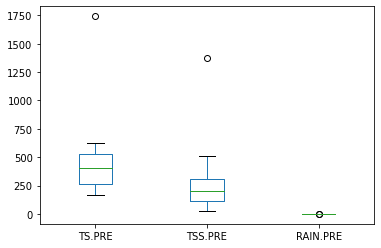

In [41]:
precon.plot.box()

<AxesSubplot:>

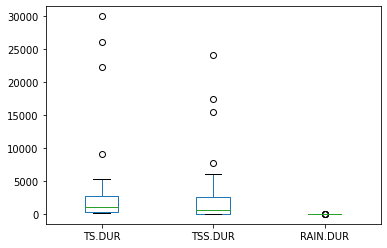

In [42]:
durcon.plot.box()

Here we see that the scales of the two data sets are quite different. Let's see if  the two construction phases represent approximately the same rainfall conditions? 

In [43]:
precon['RAIN.PRE'].describe()

count    17.000000
mean      0.878235
std       0.882045
min       0.130000
25%       0.460000
50%       0.690000
75%       0.950000
max       3.760000
Name: RAIN.PRE, dtype: float64

In [44]:
durcon['RAIN.DUR'].describe()

count    37.000000
mean      1.016486
std       1.391886
min       0.100000
25%       0.270000
50%       0.550000
75%       1.010000
max       6.550000
Name: RAIN.DUR, dtype: float64

If we look at the summary statistics, we might conclude there is more rainfall during construction, which could bias our interpretation, a box plot of just rainfall might be useful, as would hypothesis tests.

<AxesSubplot:>

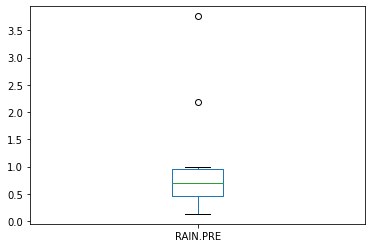

In [45]:
precon['RAIN.PRE'].plot.box()

<AxesSubplot:>

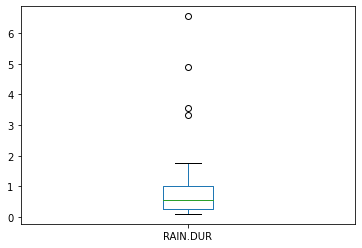

In [46]:
durcon['RAIN.DUR'].plot.box()

Hard to tell from the plots, they look a little different, but are they? Lets apply some hypothesis tests

In [47]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(precon['RAIN.PRE'],durcon['RAIN.DUR'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=291.500, p-value at rejection =0.338
Probably the same distribution


In [48]:
from scipy import stats
results = stats.ttest_ind(precon['RAIN.PRE'], durcon['RAIN.DUR'])
print('statistic=%.3f, p-value at rejection =%.3f ' % (results[0], results[1]))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=-0.375, p-value at rejection =0.709 
Probably the same distribution


From these two tests (the data are NOT paired) we conclude that the two sets of data originate from the same distribution. Thus the question "Do the two construction phases represent approximately the same rainfall conditions?" can be safely answered in the affirmative.

Continuing, lets ask the same about total solids, first plots:

<AxesSubplot:>

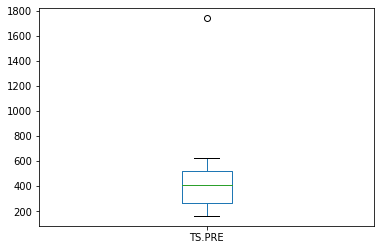

In [49]:
precon['TS.PRE'].plot.box()

<AxesSubplot:>

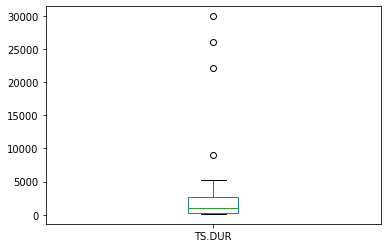

In [50]:
durcon['TS.DUR'].plot.box()

Look at the difference in scales, the during construction phase, is about 5 to 10 times greater.
But lets apply some tests to formalize our interpretation.

In [51]:
stat, p = mannwhitneyu(precon['TS.PRE'],durcon['TS.DUR'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=221.000, p-value at rejection =0.042
Probably different distributions


In [52]:
results = stats.ttest_ind(precon['TS.PRE'], durcon['TS.DUR'])
print('statistic=%.3f, p-value at rejection =%.3f ' % (results[0], results[1]))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=-1.750, p-value at rejection =0.086 
Probably different distributions


Both these tests indicate that the data derive from distirbutions with different measures of central tendency (means). Lets now ask the question about normality, we will apply a test called normaltest. This function tests a null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality. We will likely get a warning because our sample size is pretty small.

#### References

D’Agostino, R. B. (1971), “An omnibus test of normality for moderate and large sample size”, Biometrika, 58, 341-348

D’Agostino, R. and Pearson, E. S. (1973), “Tests for departure from normality”, Biometrika, 60, 613-622


In [53]:
stat, p = stats.normaltest(precon['TS.PRE'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably normal distributed')
else:
    print('Probably Not-normal distributed')

statistic=32.081, p-value at rejection =0.000
Probably Not-normal distributed


/opt/conda/envs/python/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [54]:
stat, p = stats.normaltest(durcon['TS.DUR'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably normal distributed')
else:
    print('Probably Not-normal distributed')

statistic=41.701, p-value at rejection =0.000
Probably Not-normal distributed
